In [1]:
from IPython.display import Image

## Overview

GANs have been in the Machine Learning spotlight since the [seminal paper by Ian Goodfellow et al in 2014](https://papers.nips.cc/paper/5423-generative-adversarial-nets.pdf).

The general idea is that you've got a bunch of data that you want to learn "the essence of," and you make yourself two networks:

- A Generator, `G`, that learns the underlying data generation distribution of our sample data (e.g. how you might express every R, G, B value in terms of some probability distribution), then uses random noise to generate new data
- A Discriminator, `D`, that learns to tell the difference between real data and data that the Generator passed

Then training just becomes:

- The Generator makes `N` fake images using its current understanding of `pr_data`, the probability distribution that defines our images
- It then sends `N` fake images and `N` real images over to the Discriminator
- The Discriminator tries to sort real from fake

     - Then updating based on how good/bad it did
     
- The Discriminator then passes what it learned back to the Generator
- The Generator then learns:

    - More about the underlying data distribution
    - How to make more convincing fakes (thus get caught less)
    
Rinse, repeat, for awhile, then eventually, your Generator will be able to make novel images that perfectly represent the underlying `pr_data` distribution

## Important Math Notes

### Loss Function

The loss function can be defined as

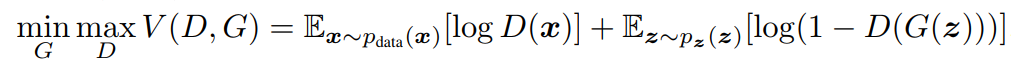

In [2]:
Image('images/loss_fn.PNG')

This looks involved, but basically you can look at each Expectation term as one step of the training process.

- Maximizing `log(D(x))` is the same as saying **"maximize the likelihood that `D` will correctly pick when the image it's looking at came from the actual dataset, x"**

- By extension, `D(G(z))` is `D`'s ability to pick correctly when `G` takes some noise and generates an image. Thus, taking 1 minus that and minimizing means "minimize the likelihood that `D` will correctly pick when `G` gives it a fake data point."

    - However, for both cognitive and computational ease, we'll instead *maximize* `D(G(z))`, or **"maximize the likelihood of `D` picking incorrectly when it sees fake images generated by `G`"**.
    
These two terms are counter to one another, hence the "Adversarial" in Generative Adversarial Networks. As a consequence of this, these are notoriously difficult to train-- if one gets a sharp edge over the other, it stays pinned and learned all but dies out.

### Convergence

The abstract of Goodfellow's paper states (and he later goes on to prove)

>In the space of arbitrary functions `G` and `D`, a unique solution exists, with `G` recovering the training data distribution and `D` equal to 1/2 everywhere

Two things to glean from this:

1) The Generator network, `G` aims to approximate the data generation distribution via very-high-dimensional [Maximum Likelihood Estimation](https://napsterinblue.github.io/notes/stats/techniques/mle/)

2) The long-run convergence of the most optimal GAN has the Discriminator, `D` differentiating real from fake data about 50% of the time (otherwise, `G` isn't doing its job very well)

Visually, this looks like:

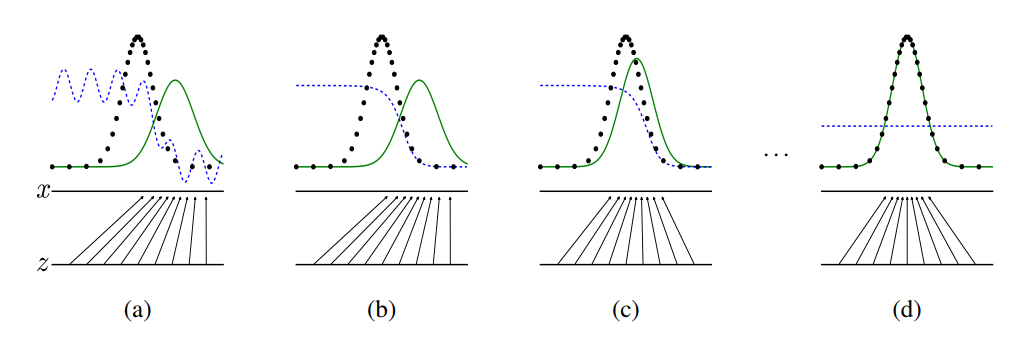

In [3]:
Image('images/visually.PNG')

For simplicity's sake, let's assume that we can represent our actual dataset with some sort of normal distribution (the dotted black line)

a) Our Generator isn't very good at first, so it samples some noise, `z` from a uniform distribution, and generates a data distribution that we can represent with the **green line**. The **blue** line is the distribution that our Discriminator uses to tell real (black) from fake (green)

b) We then train our Discriminator to get a little better to tell the difference between the two, smoothing out its line

c) The Generator, in turn, takes this information and gets a little better at approximating the probability distribution of the real data (the black line)

d) And this process repeats again and again until `pr_data` = `pr_generated` and the Discriminator's best guess is a coin flip between the two